<a href="https://colab.research.google.com/github/saishshinde15/NLP/blob/main/Sentiment_Analysis_TfidfVectorizer_my_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
dataset=pd.read_csv('Tweets.csv')

In [4]:
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
dataset = dataset[['airline_sentiment', 'text']].copy()

In [6]:
dataset

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


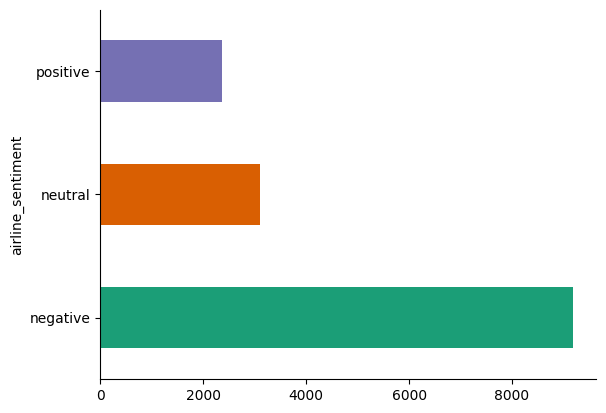

In [7]:
# @title airline_sentiment

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
dataset.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [9]:
dataset.describe()

,airline_sentiment,text
count,14640,14640
unique,3,14427
top,negative,@united thanks
freq,9178,6


In [10]:
dataset

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [11]:
X=dataset['text']

In [12]:
X

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [13]:
y=dataset['airline_sentiment']

In [14]:
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) #Not required to convert it into numerical form,string values are also fine(check Spam_filtering_TfidVec_Experiment_Binary/vs/NonBinary_Converstion notebook in gi)

In [16]:
y

array([1, 2, 1, ..., 1, 0, 1])

In [17]:
X_train_input,X_test_input,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
len(X_train_input)

11712

In [19]:
len(y_train)

11712

##Basic TfidfVectorizer in which analyzer=word is default

In [20]:
vectorizer=TfidfVectorizer() #analyzer=word is default

In [21]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [22]:
from sklearn.linear_model import LogisticRegression    ## Can use MultinomialNB also(Compare the accuracy of both id used)

In [23]:
lr=LogisticRegression(max_iter=500) ##Using max_iter to solve the cautions given by the code

In [24]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [25]:
lr_test=lr.score(X_test,y_test)

In [26]:
lr_train=lr.score(X_train,y_train)

In [27]:
model_result=(['LR Word',lr_test,lr_train])

In [28]:
model_result

['LR Word', 0.798155737704918, 0.882599043715847]

In [29]:
y_lr=lr.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,y_lr)
cm

array([[1749,   89,   24],
       [ 250,  292,   37],
       [ 117,   74,  296]])

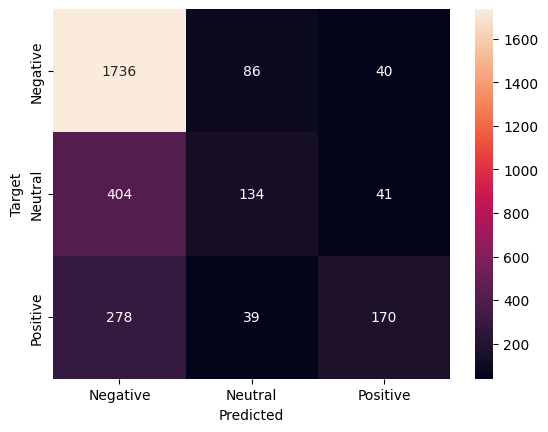

In [57]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

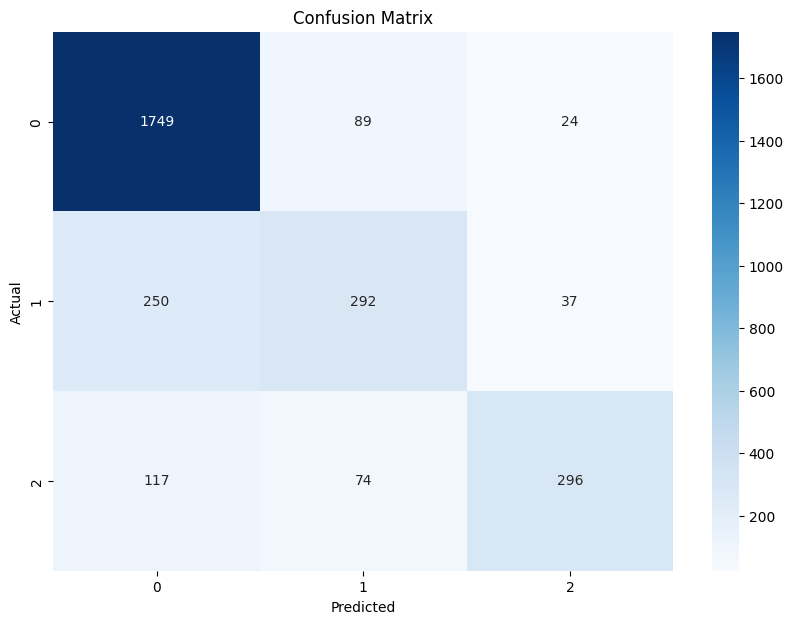

In [58]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
Pr_train = lr.predict_proba(X_train)#[:, 1]
Pr_test = lr.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9629324563522333
Test AUC: 0.8866244229296107


In [34]:


from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1862
           1       0.64      0.50      0.56       579
           2       0.83      0.61      0.70       487

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.72      2928
weighted avg       0.79      0.80      0.79      2928



In [36]:
lr.coef_  ### weights

array([[ 0.25054026,  0.03219095, -0.11936223, ...,  0.12110121,
         0.06941956,  0.19179699],
       [-0.0389061 , -0.29678459,  0.16669375, ..., -0.01541062,
        -0.03935054, -0.13704742],
       [-0.21163417,  0.26459364, -0.04733152, ..., -0.10569059,
        -0.03006902, -0.05474957]])

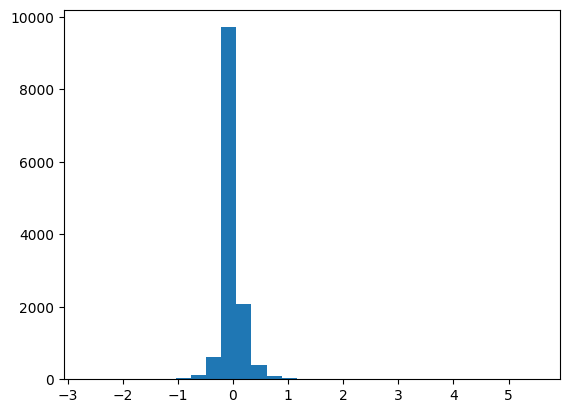

In [37]:
plt.hist(lr.coef_[2], bins=30);  ### We to coef_[2] because we have postive=2(when converted into numerical)

In [38]:
word_index_map = vectorizer.vocabulary_
word_index_map    #index mapping

{'southwestair': 10864,
 'just': 6894,
 'got': 5743,
 'it': 6680,
 'back': 2338,
 'about': 1574,
 '20': 424,
 'mins': 7861,
 'ago': 1738,
 'went': 12724,
 '18': 327,
 'hrs': 6237,
 'but': 2901,
 'appreciate': 2048,
 'the': 11511,
 'support': 11214,
 '50': 1004,
 'voucher': 12548,
 'for': 5341,
 'essentials': 4789,
 'jetblue': 6788,
 'our': 8674,
 'fleet': 5199,
 'on': 8563,
 'fleek': 5198,
 'http': 6243,
 'co': 3381,
 'q16xvwg0l6': 9475,
 'have': 5969,
 'to': 11690,
 'refrain': 9734,
 'what': 12749,
 'want': 12627,
 'say': 10285,
 'usairways': 12360,
 'never': 8210,
 'fails': 4991,
 'disappoint': 4229,
 'all': 1833,
 'real': 9633,
 'mvp': 8061,
 'with': 12864,
 'these': 11543,
 'prices': 9299,
 'americanair': 1900,
 'no': 8291,
 'was': 12643,
 'told': 11705,
 'put': 9464,
 'another': 1979,
 'flight': 5212,
 'and': 1938,
 'that': 11506,
 'would': 12948,
 'get': 5614,
 'an': 1930,
 'email': 4635,
 'still': 11040,
 'haven': 5970,
 'gotten': 5746,
 'one': 8568,
 'yet': 13080,
 'is': 6659,


In [39]:
# try it with different threshold values!   #https://chat.openai.com/share/00ae3327-f28d-4fd0-a6ad-7b8e2801beef
threshold = 1

print("Most positive words:")
for word, index in word_index_map.items():  ### We to coef_[2] because we have postive=2(when converted into numerical)
    weight = lr.coef_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
got 1.3894953751232493
appreciate 2.8256184620815286
jetblue 1.0526539280081089
all 1.423704913189165
keep 1.0694199390518213
job 1.0403106812020024
well 1.3197105307622528
thanks 5.517820638457816
good 2.08164540218887
thx 2.379657257886939
virginamerica 1.1138302962236586
very 1.4531982459258603
helpful 1.7875456311808529
crew 1.5268739015819959
attendant 1.270794100972768
happy 1.5503398743658103
thank 5.124833021436913
easy 1.0556905710808615
staff 1.119858869444345
made 1.7560809525310965
much 1.32563511963666
great 4.7713133376837895
appreciated 1.1224933124157408
nice 1.749216970409325
favorite 1.0108204872969209
amazing 3.2771431932303305
team 1.048125781380039
love 3.00878395712744
kudos 2.4012832284050183
see 1.2171466150938315
wish 1.2718359550028073
guys 1.142074602985647
excellent 2.1722140720195173
better 1.1879258471323506
glad 1.5481547597396166
best 2.9601989046825072
always 1.3924759020803092
awesome 3.7639663385284807
cool 1.8136378516686105
hot 

In [40]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
what -1.5751247764082834
usairways -1.340812722373805
americanair -1.2357740017303984
no -2.663785070733358
would -1.0966774638206211
is -1.4375608192673375
should -1.0605124694722867
united -1.170128532104453
not -2.2521305661391664
call -1.0364488176321938
cancelled -1.2831977735697326
hold -1.47423294667593
when -1.5120791584056517
can -2.181507884303879
don -1.028771926065738
change -1.050198987893135
need -1.7270628516843294
from -1.002474679357839
how -1.5670546677784714
nothing -1.2683036500286062
do -1.353212400823292
going -1.0675676485701198
if -1.2048977130177554
or -1.2638366396261538
worst -1.6680532645154285
delayed -1.2478421257475292
rude -1.1506724474468768
disappointed -1.0258708754159602
hours -1.7629508063739345


# Charater tokenisation

In [41]:
vectorizer=TfidfVectorizer(analyzer='char')

In [42]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [44]:
lr1=LogisticRegression()  #max_iter=500

In [45]:
lr1.fit(X_train,y_train)

LogisticRegression()

In [48]:
lr1_test=lr1.score(X_test,y_test)

In [49]:
lr1_train=lr1.score(X_train,y_train)

In [50]:
model_result=(['LR Word',lr_test,lr_train],
              ['LR Char',lr1_test,lr1_train])

In [51]:
model_result

(['LR Word', 0.798155737704918, 0.882599043715847],
 ['LR Char', 0.6967213114754098, 0.7005635245901639])

In [53]:
y_lr1=lr1.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test ,y_lr1)
cm

array([[1736,   86,   40],
       [ 404,  134,   41],
       [ 278,   39,  170]])

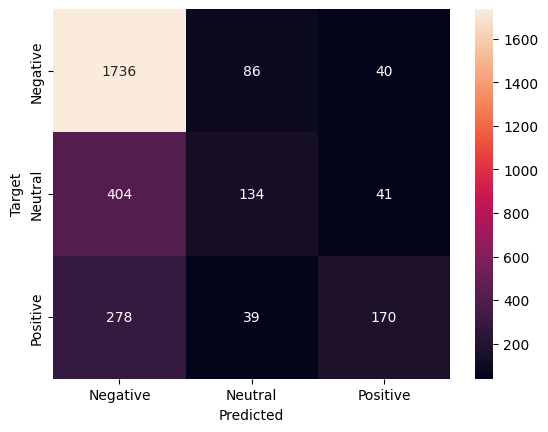

In [59]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [60]:


print(classification_report(y_test, y_lr1))


              precision    recall  f1-score   support

           0       0.72      0.93      0.81      1862
           1       0.52      0.23      0.32       579
           2       0.68      0.35      0.46       487

    accuracy                           0.70      2928
   macro avg       0.64      0.50      0.53      2928
weighted avg       0.67      0.70      0.66      2928



In [77]:
Pr_train = lr1.predict_proba(X_train)#[:, 1]
Pr_test = lr1.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.7964619581002709
Test AUC: 0.7849935437607806


In [61]:
lr1.coef_

array([[ 2.62352851e-01,  2.70067408e+00, -1.05020215e+00,
         1.22737127e+00,  1.40826899e-02,  2.20638619e+00,
         9.38555757e-02,  5.38186670e-01,  1.93135815e+00,
         1.57767633e+00, -4.09796232e+00,  1.27128101e+00,
         1.08075510e+00, -4.86033590e-01, -9.65394490e-01,
         7.66133364e-01, -1.67366587e-01,  9.93709580e-01,
         8.68266504e-02,  1.11054428e+00,  5.59884247e-01,
         1.33838549e+00,  7.40125672e-01, -1.04035017e-01,
        -6.01902774e-01, -1.05084230e-01,  1.42057227e-01,
        -3.69310919e-01, -2.11579147e-01,  1.49007270e+00,
         1.90990671e+00, -5.83329384e+00, -2.61535087e-01,
        -2.61535087e-01, -5.11335721e-01, -6.23857098e-01,
        -6.39257448e-01,  4.59803876e-01,  1.40717191e+00,
         6.66495210e-01,  7.04258452e-01, -8.35783326e-01,
         7.15604997e-01, -6.27379737e-01,  1.74186306e-02,
        -3.18539721e+00, -3.61053340e+00,  8.57477553e-01,
        -1.05684442e+00,  1.43179408e+00, -6.68979296e-0

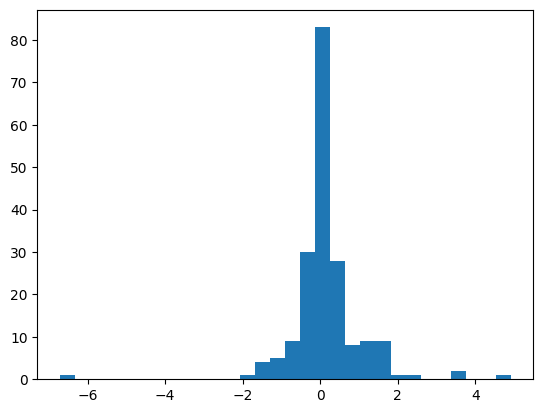

In [63]:
plt.hist(lr1.coef_[2], bins=30);

In [66]:
index_map=vectorizer.vocabulary_

In [68]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'@': 31,
 's': 54,
 'o': 50,
 'u': 56,
 't': 55,
 'h': 43,
 'w': 58,
 'e': 40,
 'a': 36,
 'i': 44,
 'r': 53,
 ' ': 1,
 '-': 14,
 'j': 45,
 'g': 42,
 'b': 37,
 'c': 38,
 'k': 46,
 '2': 19,
 '0': 17,
 'm': 48,
 'n': 49,
 '.': 15,
 '1': 18,
 '8': 25,
 '/': 16,
 'p': 51,
 '$': 5,
 '5': 22,
 'v': 57,
 '+': 12,
 'f': 41,
 'l': 47,
 '“': 82,
 ':': 27,
 "'": 8,
 'q': 52,
 '6': 23,
 'x': 59,
 '”': 83,
 'y': 60,
 'd': 39,
 '?': 30,
 ',': 13,
 '#': 4,
 '"': 3,
 '!': 2,
 'z': 61,
 '7': 24,
 ';': 28,
 ')': 10,
 '4': 21,
 '3': 20,
 '😣': 170,
 '😒': 160,
 '9': 26,
 '&': 7,
 '(': 9,
 'é': 72,
 '%': 6,
 '🙏': 189,
 '\n': 0,
 '_': 35,
 '👏': 127,
 '👌': 124,
 '😊': 153,
 '👍': 125,
 '👿': 130,
 '😷': 183,
 '—': 79,
 '=': 29,
 '😔': 161,
 '🐩': 119,
 '😃': 148,
 '’': 81,
 '✈': 94,
 '️': 103,
 '💗': 134,
 '{': 62,
 '|': 63,
 '}': 64,
 '🐳': 120,
 '😭': 177,
 '~': 65,
 '😕': 162,
 '…': 84,
 '❄': 97,
 '😫': 176,
 '*': 11,
 '😁': 146,
 '°': 68,
 '🙅': 185,
 '^': 34,
 '😜': 165,
 '😂': 147,
 '☺': 90,
 '💙': 135,
 '‘': 80,
 '😄': 

In [71]:
threshold = 1


print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr1.coef_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
t 1.2197723495720763
h 1.7534176379434854
a 1.0847638104532227
j 1.649926286568061
k 4.911601808429675
v 1.7859347030172161
x 1.3512573218644912
y 1.5562333240497441
! 3.573975614349077
z 1.2899337480159854
) 3.6458583334895422
🙏 1.5136309577862752
👏 1.7565008825458532
👌 1.608101293400547
😊 1.831283523746694
👍 2.5260081098745006
😃 1.306329422054799
️ 1.3758523088563384
^ 1.4971722199613684
💙 1.4614181183878217
❤ 1.3318606826401118
😉 1.0524751320318741
🎉 1.176979741625499


In [76]:
threshold = 0.5
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr1.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
i -1.0518319658877389
  -1.5799176961148758
b -0.7622231669993966
c -1.4246388183340957
2 -1.5025436702268273
0 -1.0107907256579367
/ -1.1946523866512673
$ -0.8428533118539678
5 -0.9741725535547927
' -1.7438948161199104
d -1.277488989129466
? -6.7137035927649755
" -0.8351397363011587
4 -0.5501254542885988
3 -0.7680949088476339
9 -0.6637580510791323
( -1.4800174073236116
* -0.6433500423320377
😂 -0.5905961995641522
😡 -0.5993290155726758


##vectorizer = TfidfVectorizer(max_features=2000)

In [112]:
vectorizer = TfidfVectorizer(max_features=5000) ##experiment with changing max_features=2000,3000,4000,etc

In [113]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [114]:
lr2=LogisticRegression()

In [115]:
lr2.fit(X_train,y_train)

LogisticRegression()

In [116]:
lr2_test=lr2.score(X_test,y_test)

In [117]:
lr2_train=lr2.score(X_train,y_train)

In [118]:
model_result=(['LR Word',lr_test,lr_train],
              ['LR Char',lr1_test,lr1_train],
              ['LR max_features',lr2_test,lr2_train])

In [119]:
model_result

(['LR Word', 0.798155737704918, 0.882599043715847],
 ['LR Char', 0.6967213114754098, 0.7005635245901639],
 ['LR max_features', 0.8025956284153005, 0.8693647540983607])

In [120]:
y_lr2=lr2.predict(X_test)

In [121]:


print(classification_report(y_test, y_lr2))


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1862
           1       0.65      0.52      0.58       579
           2       0.83      0.62      0.71       487

    accuracy                           0.80      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.80      0.80      0.79      2928



In [122]:
Pr_train = lr2.predict_proba(X_train)#[:, 1]
Pr_test = lr2.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9549320073690456
Test AUC: 0.8879904732697749


In [124]:
cm = confusion_matrix(y_test, y_lr2, normalize='true')
cm

array([[0.93984962, 0.04726101, 0.01288937],
       [0.42141623, 0.5164076 , 0.06217617],
       [0.23613963, 0.14579055, 0.61806982]])

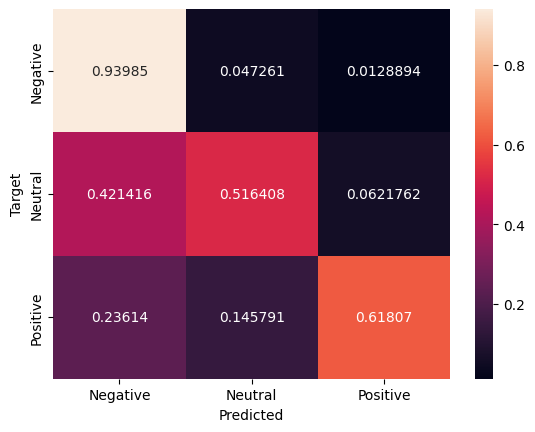

In [125]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [126]:
lr2.coef_

array([[ 0.28452109, -0.03099188,  0.22216533, ...,  0.76974355,
        -0.55436931,  0.17673731],
       [-0.06449867, -0.35671552, -0.1561384 , ..., -0.29548365,
         0.4452685 , -0.06367215],
       [-0.22002242,  0.3877074 , -0.06602693, ..., -0.4742599 ,
         0.10910081, -0.11306516]])

(array([1.000e+00, 2.000e+00, 0.000e+00, 6.000e+00, 7.000e+00, 1.600e+01,
        5.900e+01, 1.640e+02, 8.930e+02, 2.582e+03, 7.960e+02, 2.940e+02,
        9.000e+01, 4.900e+01, 1.500e+01, 8.000e+00, 5.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([-2.52631533, -2.26330147, -2.00028761, -1.73727376, -1.4742599 ,
        -1.21124605, -0.94823219, -0.68521833, -0.42220448, -0.15919062,
         0.10382324,  0.36683709,  0.62985095,  0.89286481,  1.15587866,
         1.41889252,  1.68190637,  1.94492023,  2.20793409,  2.47094794,
         2.7339618 ,  2.99697566,  3.25998951,  3.52300337,  3.78601723,
         4.04903108,  4.31204494,  4.57505879,  4.83807265,  5.10108651,
         5.36410036]),
 <BarContainer object of 30 artists>)

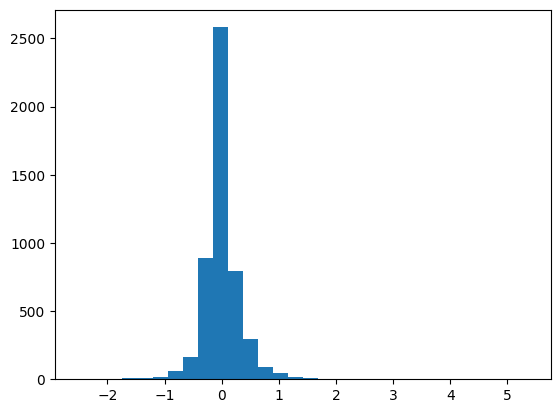

In [129]:
plt.hist(lr2.coef_[2],bins=30)

In [130]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'southwestair': 4237,
 'just': 2523,
 'got': 2015,
 'it': 2445,
 'back': 564,
 'about': 287,
 '20': 60,
 'mins': 2924,
 'ago': 355,
 'went': 4863,
 '18': 44,
 'hrs': 2249,
 'but': 778,
 'appreciate': 465,
 'the': 4509,
 'support': 4391,
 '50': 199,
 'voucher': 4789,
 'for': 1843,
 'jetblue': 2486,
 'our': 3236,
 'fleet': 1774,
 'on': 3175,
 'fleek': 1773,
 'http': 2251,
 'co': 1015,
 'have': 2119,
 'to': 4567,
 'refrain': 3740,
 'what': 4869,
 'want': 4813,
 'say': 4017,
 'usairways': 4739,
 'never': 3045,
 'fails': 1661,
 'disappoint': 1373,
 'all': 384,
 'real': 3688,
 'mvp': 3000,
 'with': 4914,
 'these': 4519,
 'prices': 3530,
 'americanair': 408,
 'no': 3071,
 'was': 4823,
 'told': 4575,
 'put': 3621,
 'another': 430,
 'flight': 1783,
 'and': 419,
 'that': 4507,
 'would': 4954,
 'get': 1957,
 'an': 416,
 'email': 1496,
 'still': 4308,
 'haven': 2120,
 'gotten': 2018,
 'one': 3178,
 'yet': 4981,
 'is': 2436,
 'this': 4530,
 'brothers': 732,
 'should': 4132,
 'keep': 2535,
 'my': 3

In [132]:
threshold = 1

print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr2.coef_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
got 1.3274720203115562
appreciate 2.7897849606818186
jetblue 1.01992989533644
all 1.4081126491240978
keep 1.0501756115005123
well 1.282495691417682
thanks 5.364100364075605
good 2.086708244521333
thx 2.4249510245021892
very 1.4306308408409734
helpful 1.8287345854020847
beautiful 1.0313161775138855
crew 1.4525995439969468
attendant 1.3032275615532811
happy 1.6381352366897262
date 1.0062607904426029
thank 5.018194461103807
easy 1.0626968664949248
staff 1.0880411137800636
made 1.6945344929014103
much 1.2702306850107445
great 4.711107697050906
appreciated 1.0730714273199473
airline 1.1014237850112598
nice 1.7524092288641928
amazing 3.287894160132752
team 1.0762004732875887
love 2.951023772911976
kudos 2.3757760857825754
see 1.0448374734415946
wish 1.3343491569429602
guys 1.1171572569851185
excellent 2.24379379823442
better 1.2680425441817356
glad 1.6006922623586626
best 2.877335874958271
always 1.4528050737831444
awesome 3.620603142150253
cool 1.6769477242216517
hot 1.

In [134]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr2.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
what -1.4758664020625423
usairways -1.2865700786272325
americanair -1.1506115680796836
no -2.526315327196115
would -1.1392670183562401
is -1.3576090728796706
should -1.0307903363433455
united -1.0131930404826481
not -2.200024671844659
call -1.0305760258928944
cancelled -1.286144108379128
hold -1.4775567111928494
when -1.4407681890254096
can -2.046101121709337
change -1.0885918906631775
need -1.7363898954978916
how -1.5286885057174209
nothing -1.2213819191307036
do -1.2996877937882074
going -1.0702749047118256
if -1.1210871552620438
or -1.2685607048035383
worst -1.7143814065599223
delayed -1.2038222408060266
rude -1.1917852970033302
disappointed -1.049969878303084
hours -1.7129442078934631
paid -1.0240846032244835


##Lemmatization

In [135]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [136]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [137]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [138]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [141]:
vectorizer=TfidfVectorizer(tokenizer=LemmaTokenizer())

In [142]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [143]:
lr3=LogisticRegression()

In [144]:
lr3.fit(X_train,y_train)

LogisticRegression()

In [147]:
lr3_test=lr3.score(X_test,y_test)

In [148]:
lr3_train=lr3.score(X_train,y_train)

In [149]:
model_result=(['LR Word',lr_test,lr_train],
              ['LR Char',lr1_test,lr1_train],
              ['LR max_features',lr2_test,lr2_train],
              ['LR Lemmatization',lr3_test,lr3_train])

In [150]:
model_result

(['LR Word', 0.798155737704918, 0.882599043715847],
 ['LR Char', 0.6967213114754098, 0.7005635245901639],
 ['LR max_features', 0.8025956284153005, 0.8693647540983607],
 ['LR Lemmatization', 0.8128415300546448, 0.8832821038251366])

In [151]:
Pr_train = lr3.predict_proba(X_train)#[:, 1]
Pr_test = lr3.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9617898336188949
Test AUC: 0.8983816825638867


In [155]:
y_lr3=lr3.predict(X_test)

In [156]:
cm = confusion_matrix(y_test, y_lr3, normalize='true')
cm

array([[0.93233083, 0.05316864, 0.01450054],
       [0.38169257, 0.54231434, 0.07599309],
       [0.19917864, 0.12320329, 0.67761807]])

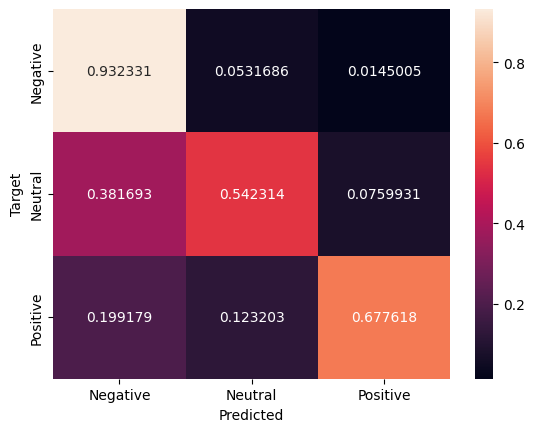

In [157]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [158]:


print(classification_report(y_test, y_lr3))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1862
           1       0.66      0.54      0.60       579
           2       0.82      0.68      0.74       487

    accuracy                           0.81      2928
   macro avg       0.78      0.72      0.74      2928
weighted avg       0.81      0.81      0.81      2928



In [159]:
lr3.coef_

array([[-0.5780394 ,  0.18154336,  1.78568739, ..., -0.03540341,
        -0.14868887, -0.03481754],
       [-1.98931706, -1.23759993, -1.09484564, ..., -0.02668073,
         0.19906965,  0.07552378],
       [ 2.56735646,  1.05605657, -0.69084176, ...,  0.06208414,
        -0.05038078, -0.04070623]])

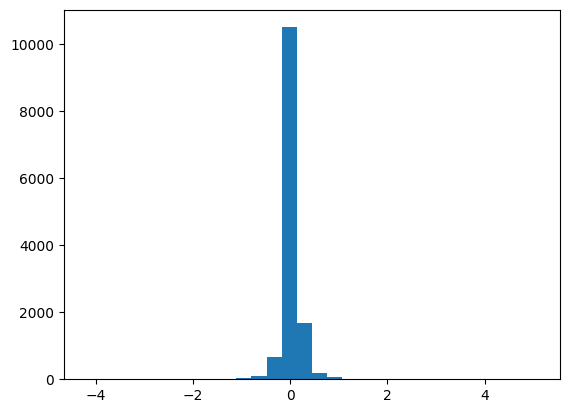

In [161]:
plt.hist(lr3.coef_[2], bins=30);

In [162]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'@': 2787,
 'southwestair': 11071,
 '-': 61,
 'just': 7640,
 'get': 6525,
 'it': 7446,
 'back': 3610,
 'about': 2924,
 '20': 1621,
 'min': 8466,
 'ago': 3060,
 '.': 103,
 'go': 6588,
 '18': 1473,
 'hr': 7060,
 'w/o': 12620,
 'but': 4100,
 'i': 7104,
 'appreciate': 3349,
 'the': 11620,
 'support': 11357,
 '$': 2,
 '50': 2267,
 'voucher': 12570,
 '+': 48,
 'for': 6288,
 'essential': 5765,
 '“': 13119,
 'jetblue': 7547,
 ':': 2779,
 'our': 9223,
 'fleet': 6129,
 "'s": 35,
 'on': 9107,
 'fleek': 6128,
 'http': 7067,
 '//t.co/q16xvwg0l6': 773,
 '”': 13120,
 '....': 106,
 'have': 6820,
 'to': 11794,
 'refrain': 10126,
 'what': 12773,
 'want': 12673,
 'say': 10570,
 'usairways': 12413,
 'never': 8778,
 'fail': 5947,
 'disappoint': 5289,
 "y'all": 12998,
 'real': 10040,
 'mvp': 8655,
 'with': 12877,
 'these': 11655,
 'price': 9783,
 '...': 105,
 'americanair': 3210,
 'no': 8850,
 'be': 3716,
 'tell': 11548,
 'put': 9915,
 'another': 3287,
 'flight': 6140,
 'and': 3247,
 'that': 11615,
 'would

In [165]:
threshold = 1

print("Most positive words:")
for word, index in word_index_map.items():
    weight = lr3.coef_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
southwestair 1.0037679157106751
. 1.0995678431217364
appreciate 2.307426405423694
thing 1.0376287525888523
job 1.0130203870829957
well 1.6961018241558954
# 1.0560565691413526
make 1.3369079269414645
thanks 5.078523309104212
! 2.5673564584272643
good 1.905081659459417
thx 2.342712587948423
virginamerica 1.0188607333542925
very 1.5368259063129115
helpful 1.648736711895674
) 2.669414641699488
crew 1.575929660080284
attendant 1.1892878846725352
all 1.2542977438443936
work 1.2116525284798056
thank 4.688937623995003
happy 1.4150382134941413
friendly 1.2319424087733157
staff 1.0630487510542166
much 1.1063285081102354
great 4.616563748945888
see 1.1082932187996792
nice 1.671915722803924
amaze 1.986550748755516
love 3.075991182346464
amazing 2.117536897361704
kudos 2.3488832040001237
wish 1.184274405896569
guy 1.3973407407070542
excellent 2.0114239521615658
glad 1.5102971390321875
beyond 1.054225560135177
best 2.5821774850986197
always 1.0842302396314591
worry 1.60764076308

In [163]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr3.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
hr -1.026059076486625
usairways -1.3037290825809793
americanair -1.0620409362379581
no -2.316117707860261
tell -1.0766364555754473
would -1.2255771368189696
n't -1.645337027637751
? -4.196668383454446
not -2.3000720048539565
bad -1.6549338407565812
cancel -1.116979745452729
leave -1.4840907002585444
hold -1.3673624897624441
when -1.0901019070082554
can -1.971511028253973
pay -1.3445246147202718
luggage -1.0005522616896847
need -2.2150704711471754
passenger -1.005359742782471
nothing -1.1044955338027134
hour -1.6108217830070757
if -1.0838158365665729
delay -1.0906261215709219
( -1.1708320968941095
lose -1.2645877360050253
rude -1.1543256497925989
suck -1.3614055027048484


## Porter Stemmer

In [166]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [168]:
vectorizer=TfidfVectorizer(tokenizer=StemTokenizer())

In [169]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [170]:
lr4=LogisticRegression()

In [172]:
lr4.fit(X_train,y_train)

LogisticRegression()

In [175]:
lr4_test=lr4.score(X_test,y_test)

In [176]:
lr4_train=lr4.score(X_train,y_train)

In [177]:
model_result=(['LR Word',lr_test,lr_train],
              ['LR Char',lr1_test,lr1_train],
              ['LR max_features',lr2_test,lr2_train],
              ['LR Lemmatization',lr3_test,lr3_train],
              ['LR Porterstemmer',lr4_test,lr4_train])

In [178]:
model_result

(['LR Word', 0.798155737704918, 0.882599043715847],
 ['LR Char', 0.6967213114754098, 0.7005635245901639],
 ['LR max_features', 0.8025956284153005, 0.8693647540983607],
 ['LR Lemmatization', 0.8128415300546448, 0.8832821038251366],
 ['LR Porterstemmer', 0.8077185792349727, 0.8829405737704918])

In [179]:
y_lr4=lr4.predict(X_test)

In [181]:
Pr_train = lr4.predict_proba(X_train)#[:, 1]
Pr_test = lr4.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9616557926164336
Test AUC: 0.8995012328661977


In [183]:
cm = confusion_matrix(y_test, y_lr4, normalize='true')
cm

array([[0.92857143, 0.05531686, 0.01611171],
       [0.37823834, 0.54404145, 0.07772021],
       [0.21149897, 0.12936345, 0.65913758]])

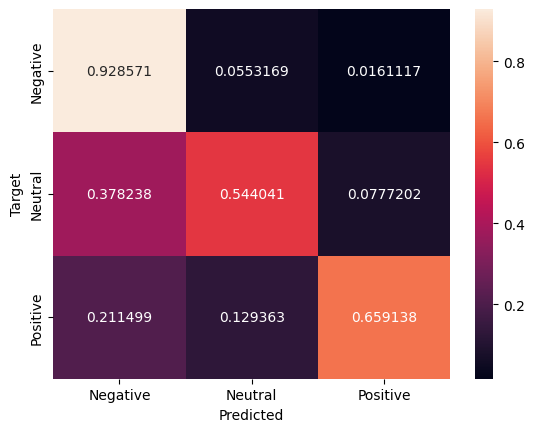

In [184]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [185]:


print(classification_report(y_test, y_lr4))


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1862
           1       0.65      0.54      0.59       579
           2       0.81      0.66      0.73       487

    accuracy                           0.81      2928
   macro avg       0.77      0.71      0.74      2928
weighted avg       0.80      0.81      0.80      2928



In [186]:
lr4.coef_

array([[-0.54465808,  0.16264729,  1.81267066, ..., -0.0266497 ,
        -0.14628244, -0.03498403],
       [-1.98018195, -1.24401711, -1.10549416, ..., -0.02018747,
         0.20106387,  0.07521186],
       [ 2.52484003,  1.08136982, -0.7071765 , ...,  0.04683717,
        -0.05478142, -0.04022783]])

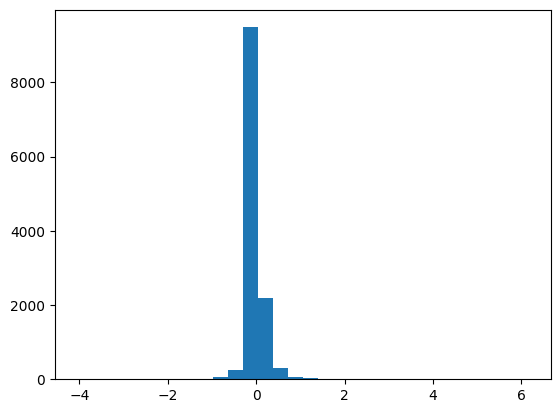

In [187]:
plt.hist(lr4.coef_[2], bins=30);

In [188]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'@': 2766,
 'southwestair': 10347,
 '-': 61,
 'just': 7197,
 'got': 6270,
 'it': 7005,
 'back': 3496,
 'about': 2902,
 '20': 1618,
 'min': 7972,
 'ago': 3014,
 '.': 103,
 'went': 11906,
 '18': 1470,
 'hr': 6681,
 'w/o': 11777,
 'but': 3971,
 'i': 6721,
 'appreci': 3274,
 'the': 10856,
 'support': 10611,
 '$': 2,
 '50': 2253,
 'voucher': 11727,
 '+': 48,
 'for': 5932,
 'essenti': 5457,
 '“': 12266,
 'jetblu': 7105,
 ':': 2758,
 'our': 8694,
 'fleet': 5785,
 "'s": 35,
 'on': 8588,
 'fleek': 5784,
 'http': 6688,
 '//t.co/q16xvwg0l6': 772,
 '”': 12267,
 '....': 106,
 'have': 6449,
 'to': 11018,
 'refrain': 9503,
 'what': 11927,
 'want': 11828,
 'say': 9879,
 'usairway': 11581,
 'never': 8268,
 'fail': 5611,
 'disappoint': 5039,
 "y'all": 12148,
 'real': 9433,
 'mvp': 8153,
 'with': 12029,
 'these': 10890,
 'price': 9202,
 '...': 105,
 'americanair': 3152,
 'no': 8341,
 'wa': 11791,
 'told': 11037,
 'put': 9318,
 'anoth': 3222,
 'flight': 5796,
 'and': 3188,
 'that': 10852,
 'would': 12094

In [189]:
threshold = 1

print("Most positive words:")
for word, index in word_index_map.items():     ###Some words doesnt make sense that is the reason we use Lemmetization over Stemming
    weight = lr4.coef_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
got 1.4687598032520084
appreci 2.4956051806959905
y'all 1.0030371737554558
thing 1.0548028602314337
job 1.0180453454742275
well 1.2580375089095854
# 1.0813698183686986
thank 6.160699378385948
! 2.524840026824959
good 2.161672231292057
thx 2.365483778373589
veri 1.4926125220451503
beauti 1.1310218783170374
) 2.559926687006346
crew 1.5548615629254914
attend 1.1333398456974753
all 1.2534648858998647
work 1.1044344399914452
happi 1.3633728751134622
staff 1.0643682663976308
made 1.4239773850369841
much 1.1141484136556699
great 4.648397344573535
see 1.0053420695344748
nice 1.632394421125184
amaz 2.9876312228530124
love 3.3044349706321148
kudo 2.332836938086333
wish 1.0993921597535046
guy 1.2905837641092759
excel 1.9977852988510958
better 1.0738165139448308
glad 1.4880269607007823
impress 1.2138424491570525
beyond 1.0710125747647978
best 2.6389021964777486
alway 1.0855658330802214
worri 1.4927513226087177
awesom 3.5862540142718116
cool 1.7044809960102476
hot 1.01455141332

In [191]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr4.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
hr -1.0280895955453884
usairway -1.370154482471295
americanair -1.2491344398066873
no -2.392852577701003
would -1.1994428751496151
n't -1.509743622875435
is -1.3652661829895083
? -4.046933081424937
unit -1.2078382472389209
not -2.2847632843283456
do -1.136842554108795
cancel -1.129414466614774
leav -1.124822501608551
hold -1.4222358007798586
when -1.1269706895870077
can -1.9468746585508123
need -2.1047986763247564
noth -1.2147334441090663
hour -1.6066176430351184
if -1.067138935156504
delay -1.2985519788975823
( -1.1872167840661259
worst -1.750646622226523
rude -1.1737334654833669
suck -1.2927805511751655


##Stopword Removal

In [195]:
vectorizer=TfidfVectorizer(stop_words='english')

In [196]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [197]:
lr5=LogisticRegression()

In [198]:
lr5.fit(X_train,y_train)

LogisticRegression()

In [201]:
lr5_test=lr5.score(X_test,y_test)

In [202]:
lr5_train=lr5.score(X_train,y_train)

In [203]:
model_result=(['LR Word',lr_test,lr_train],
              ['LR Char',lr1_test,lr1_train],
              ['LR max_features',lr2_test,lr2_train],
              ['LR Lemmatization',lr3_test,lr3_train],
              ['LR Porterstemmer',lr4_test,lr4_train],
              ['LR StopWord',lr5_test,lr5_train])

In [204]:
model_result

(['LR Word', 0.798155737704918, 0.882599043715847],
 ['LR Char', 0.6967213114754098, 0.7005635245901639],
 ['LR max_features', 0.8025956284153005, 0.8693647540983607],
 ['LR Lemmatization', 0.8128415300546448, 0.8832821038251366],
 ['LR Porterstemmer', 0.8077185792349727, 0.8829405737704918],
 ['LR StopWord', 0.7776639344262295, 0.8752561475409836])

In [205]:
y_lr5=lr5.predict(X_test)

In [206]:
Pr_train = lr5.predict_proba(X_train)#[:, 1]
Pr_test = lr5.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9596233079712638
Test AUC: 0.8713368008794671


In [207]:
cm = confusion_matrix(y_test, y_lr5, normalize='true')
cm

array([[0.92749731, 0.05477981, 0.01772288],
       [0.49222798, 0.44559585, 0.06217617],
       [0.2587269 , 0.14168378, 0.59958932]])

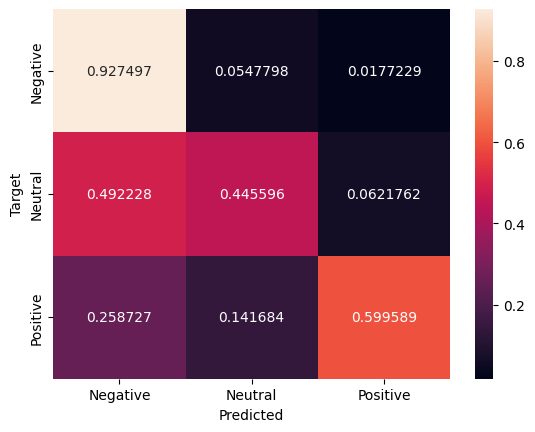

In [210]:
def plot_cm(cm):
  classes = ['Negative', 'Neutral','Positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [211]:


print(classification_report(y_test, y_lr5))


              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1862
           1       0.60      0.45      0.51       579
           2       0.81      0.60      0.69       487

    accuracy                           0.78      2928
   macro avg       0.74      0.66      0.69      2928
weighted avg       0.77      0.78      0.76      2928



In [212]:
lr5.coef_

array([[ 0.25565116,  0.07328077, -0.1790555 , ...,  0.17700741,
         0.15968933,  0.18204802],
       [-0.05250131, -0.38881871,  0.21778597, ..., -0.03165265,
        -0.08899731, -0.13740123],
       [-0.20314985,  0.31553795, -0.03873047, ..., -0.14535476,
        -0.07069202, -0.04464679]])

(array([3.000e+00, 4.000e+00, 9.000e+00, 2.100e+01, 6.200e+01, 1.700e+02,
        7.260e+02, 9.176e+03, 1.781e+03, 6.810e+02, 1.490e+02, 4.900e+01,
        3.200e+01, 1.600e+01, 5.000e+00, 5.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-1.79046969, -1.56054436, -1.33061904, -1.10069371, -0.87076839,
        -0.64084306, -0.41091774, -0.18099241,  0.04893291,  0.27885823,
         0.50878356,  0.73870888,  0.96863421,  1.19855953,  1.42848486,
         1.65841018,  1.88833551,  2.11826083,  2.34818616,  2.57811148,
         2.80803681,  3.03796213,  3.26788746,  3.49781278,  3.72773811,
         3.95766343,  4.18758876,  4.41751408,  4.6474394 ,  4.87736473,
         5.10729005]),
 <BarContainer object of 30 artists>)

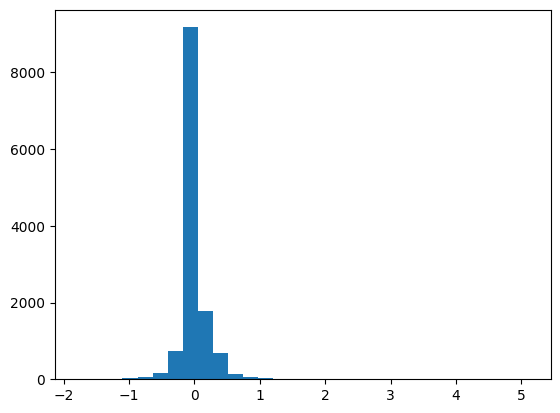

In [214]:
plt.hist(lr5.coef_[2],bins=30)

In [215]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'southwestair': 10660,
 'just': 6770,
 'got': 5642,
 '20': 424,
 'mins': 7726,
 'ago': 1732,
 'went': 12473,
 '18': 327,
 'hrs': 6124,
 'appreciate': 2022,
 'support': 11008,
 '50': 1004,
 'voucher': 12300,
 'essentials': 4715,
 'jetblue': 6664,
 'fleet': 5110,
 'fleek': 5109,
 'http': 6130,
 'q16xvwg0l6': 9295,
 'refrain': 9552,
 'want': 12379,
 'say': 10102,
 'usairways': 12114,
 'fails': 4909,
 'disappoint': 4167,
 'real': 9451,
 'mvp': 7920,
 'prices': 9120,
 'americanair': 1885,
 'told': 11472,
 'flight': 5123,
 'email': 4563,
 'haven': 5866,
 'gotten': 5645,
 'ringling': 9849,
 'brothers': 2766,
 'barnum': 2386,
 'bailey': 2350,
 'eyes': 4872,
 'peeled': 8736,
 'clown': 3298,
 'car': 2960,
 'united': 11972,
 'thing': 11339,
 'consistent': 3542,
 'unfortunately': 11959,
 'doing': 4296,
 'job': 6717,
 'alwaysdelayedonunited': 1865,
 'know': 6903,
 'use': 12129,
 'canada': 2933,
 'time': 11416,
 'figured': 5040,
 'late': 6994,
 'check': 3143,
 'bags': 2345,
 'trying': 11656,
 'make

In [217]:
threshold = 1

print("Most positive words:")
for word, index in word_index_map.items():   ### Even if this model accuarcy is low,it removed all stopwords ,that is the reason we have all main words that eill impact
    weight = lr5.coef_[2][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
got 1.314753279111249
appreciate 2.8933973112382505
job 1.1982113732639554
thanks 5.041779248436834
good 2.0295332331986926
thx 2.44949311089585
virginamerica 1.1168870075440598
helpful 1.8387584322139368
welcome 1.0548874528829515
crew 1.2446780794184737
attendant 1.3757925309615755
happy 1.6307842941970419
making 1.0170486865573578
thank 5.107290053922207
easy 1.074240966033728
professional 1.1274031982457553
staff 1.09909738626546
great 4.304690422440975
appreciated 1.0787634206546015
nice 1.6363464659226798
amazing 3.247700781002177
team 1.0792253752408447
love 2.7874703299703225
kudos 2.574973802201343
wish 1.444058609708515
guys 1.1424969122255504
excellent 2.3561685112086312
better 1.1292630207605916
glad 1.6556750811179113
congrats 1.1083097144267797
best 2.937255610258724
big 1.0507002397457375
year 1.0388518586281104
forward 1.045607098472754
awesome 3.73310009735122
cool 1.4689654101643286
hot 1.2975921612052657
luv 1.2319908607313648
wonderful 1.6716682

In [218]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = lr5.coef_[2][index]
    if weight < -threshold:
        print(word, weight)

Most negative words:
usairways -1.1772984326879836
americanair -1.2254635968411294
email -1.2039075592314197
united -1.1637905873232708
trying -1.0389971130022635
website -1.1332668572980122
says -1.0584127749444245
cancelled -1.2731579955429264
hold -1.7177841926042592
pay -1.0387412434576149
change -1.333641610366324
need -1.7665502638856219
flights -1.096228136821893
hour -1.0056446425294632
bag -1.0449772071175323
going -1.3306337766346885
worst -1.5292583667450483
delayed -1.2535625015901923
rude -1.0403061463851326
does -1.294953491052659
hours -1.7904696876934962
policy -1.1041208462744054
online -1.3371235953565492
